In [1]:
import pandas as pd

In [2]:
# Importa os dados 2018
ENEM_2018 = pd.read_csv(
    '2018\DADOS\MICRODADOS_ENEM_2018.csv',
    delimiter=';',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2018['REGIAO'] = ENEM_2018['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

ENEM_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513747 entries, 0 to 5513746
Data columns (total 7 columns):
NU_ANO                     int64
CO_MUNICIPIO_RESIDENCIA    int64
SG_UF_RESIDENCIA           object
NU_IDADE                   float64
TP_SEXO                    object
TP_LINGUA                  int64
REGIAO                     object
dtypes: float64(1), int64(3), object(3)
memory usage: 294.5+ MB


In [3]:
ENEM_2018.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_LINGUA,REGIAO
0,2018,5300108,DF,44.0,M,1,5
1,2018,2111102,MA,23.0,F,0,2
2,2018,3530607,SP,23.0,F,0,3
3,2018,2916401,BA,26.0,F,1,2
4,2018,2918100,BA,20.0,M,1,2


In [4]:
# Importa os dados 2017
ENEM_2017 = pd.read_csv(
    '2017\DADOS\MICRODADOS_ENEM_2017.csv',
    delimiter=';',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2017['REGIAO'] = ENEM_2017['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])
ENEM_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731341 entries, 0 to 6731340
Data columns (total 7 columns):
NU_ANO                     int64
CO_MUNICIPIO_RESIDENCIA    int64
SG_UF_RESIDENCIA           object
NU_IDADE                   float64
TP_SEXO                    object
TP_LINGUA                  int64
REGIAO                     object
dtypes: float64(1), int64(3), object(3)
memory usage: 359.5+ MB


In [5]:
ENEM_2017.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_LINGUA,REGIAO
0,2017,3503208,SP,29.0,F,0,3
1,2017,5002902,MS,22.0,F,0,5
2,2017,3550308,SP,38.0,F,1,3
3,2017,4209300,SC,35.0,F,1,4
4,2017,2704302,AL,40.0,M,0,2


In [6]:
ENEM_2016 = pd.read_csv(
    '2016\DADOS\microdados_enem_2016.csv',
    delimiter=';',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2016['REGIAO'] = ENEM_2016['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])
ENEM_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627367 entries, 0 to 8627366
Data columns (total 7 columns):
NU_ANO                     int64
CO_MUNICIPIO_RESIDENCIA    int64
SG_UF_RESIDENCIA           object
NU_IDADE                   float64
TP_SEXO                    object
TP_LINGUA                  int64
REGIAO                     object
dtypes: float64(1), int64(3), object(3)
memory usage: 460.8+ MB


In [10]:
ENEM_2016.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_LINGUA,REGIAO
0,2016,2507507,PB,23.0,M,1,2
1,2016,4128708,PR,20.0,M,1,4
2,2016,2927408,BA,21.0,M,0,2
3,2016,1501402,PA,17.0,M,1,1
4,2016,5300108,DF,36.0,F,0,5


In [11]:
ENEM_2015 = pd.read_csv(
    '2015\DADOS\MICRODADOS_ENEM_2015.csv',
    delimiter=',',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2015['REGIAO'] = ENEM_2015['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])
ENEM_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746427 entries, 0 to 7746426
Data columns (total 7 columns):
NU_ANO                     int64
CO_MUNICIPIO_RESIDENCIA    int64
SG_UF_RESIDENCIA           object
NU_IDADE                   float64
TP_SEXO                    object
TP_LINGUA                  int64
REGIAO                     object
dtypes: float64(1), int64(3), object(3)
memory usage: 413.7+ MB


In [12]:
ENEM_2015.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_LINGUA,REGIAO
0,2015,4309209,RS,42.0,M,1,4
1,2015,3143302,MG,21.0,M,1,3
2,2015,2609600,PE,22.0,M,0,2
3,2015,3106200,MG,23.0,F,0,3
4,2015,3168606,MG,18.0,M,1,3


In [13]:
ENEM_2014 = pd.read_csv(
    '2014\DADOS\MICRODADOS_ENEM_2014.csv',
    delimiter=',',
    encoding='iso-8859-1',
    usecols=['NU_ANO','COD_MUNICIPIO_RESIDENCIA','UF_RESIDENCIA',
             'IDADE','TP_SEXO','TP_LINGUA']
)

ENEM_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 7 columns):
NU_ANO                      int64
COD_MUNICIPIO_RESIDENCIA    int64
UF_RESIDENCIA               object
IDADE                       float64
TP_SEXO                     object
TP_LINGUA                   int64
REGIAO                      object
dtypes: float64(1), int64(3), object(3)
memory usage: 465.8+ MB


In [14]:
ENEM_2014=ENEM_2014.rename(columns={"COD_MUNICIPIO_RESIDENCIA":"CO_MUNICIPIO_RESIDENCIA",
                          "UF_RESIDENCIA":"SG_UF_RESIDENCIA","IDADE":"NU_IDADE"})
#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2014['REGIAO'] = ENEM_2015['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

ENEM_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 7 columns):
NU_ANO                     int64
CO_MUNICIPIO_RESIDENCIA    int64
SG_UF_RESIDENCIA           object
NU_IDADE                   float64
TP_SEXO                    object
TP_LINGUA                  int64
REGIAO                     object
dtypes: float64(1), int64(3), object(3)
memory usage: 465.8+ MB


In [15]:
ENEM_2014.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_LINGUA,REGIAO
0,2014,3548708,SP,18.0,F,0,4
1,2014,3118601,MG,24.0,M,1,3
2,2014,3550308,SP,19.0,M,1,2
3,2014,3550308,SP,18.0,F,1,3
4,2014,2933307,BA,45.0,M,1,3


In [16]:
ENEM = pd.concat([ENEM_2018,ENEM_2017],
                 sort='SG_UF_RESIDENCIA')
ENEM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245088 entries, 0 to 6731340
Data columns (total 7 columns):
CO_MUNICIPIO_RESIDENCIA    int64
NU_ANO                     int64
NU_IDADE                   float64
REGIAO                     object
SG_UF_RESIDENCIA           object
TP_LINGUA                  int64
TP_SEXO                    object
dtypes: float64(1), int64(3), object(3)
memory usage: 747.4+ MB


In [17]:
del ENEM_2018,ENEM_2017

In [18]:
ENEM = pd.concat([ENEM,ENEM_2016],
                 sort='SG_UF_RESIDENCIA')
ENEM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20872455 entries, 0 to 8627366
Data columns (total 7 columns):
CO_MUNICIPIO_RESIDENCIA    int64
NU_ANO                     int64
NU_IDADE                   float64
REGIAO                     object
SG_UF_RESIDENCIA           object
TP_LINGUA                  int64
TP_SEXO                    object
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ GB


In [20]:
del ENEM_2016

In [21]:
ENEM = pd.concat([ENEM,ENEM_2015],
                 sort='SG_UF_RESIDENCIA')
ENEM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28618882 entries, 0 to 7746426
Data columns (total 7 columns):
CO_MUNICIPIO_RESIDENCIA    int64
NU_ANO                     int64
NU_IDADE                   float64
REGIAO                     object
SG_UF_RESIDENCIA           object
TP_LINGUA                  int64
TP_SEXO                    object
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ GB


In [22]:
del ENEM_2015

In [23]:
ENEM = pd.concat([ENEM,ENEM_2014],
                 sort='SG_UF_RESIDENCIA')
ENEM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37341130 entries, 0 to 8722247
Data columns (total 7 columns):
CO_MUNICIPIO_RESIDENCIA    int64
NU_ANO                     int64
NU_IDADE                   float64
REGIAO                     object
SG_UF_RESIDENCIA           object
TP_LINGUA                  int64
TP_SEXO                    object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.2+ GB


In [24]:
del ENEM_2014

In [25]:
import gc
gc.collect()

49

In [27]:
ENEM

,CO_MUNICIPIO_RESIDENCIA,NU_ANO,NU_IDADE,REGIAO,SG_UF_RESIDENCIA,TP_LINGUA,TP_SEXO
0,5300108,2018,44.0,5,DF,1,M
1,2111102,2018,23.0,2,MA,0,F
2,3530607,2018,23.0,3,SP,0,F
3,2916401,2018,26.0,2,BA,1,F
4,2918100,2018,20.0,2,BA,1,M
5,2507507,2018,23.0,2,PB,1,F
6,3171709,2018,35.0,3,MG,0,F
7,2207702,2018,39.0,2,PI,0,M
8,2304400,2018,19.0,2,CE,0,M
9,5103403,2018,25.0,5,MT,1,F


In [28]:
import matplotlib.pyplot as plt

In [29]:
plt.rcParams['figure.figsize'] = (11,7)

In [30]:
ESPANHOL = ENEM[ENEM['TP_LINGUA'] == 1].groupby('NU_ANO').count()['TP_LINGUA']
ESPANHOL

NU_ANO
2014    5310562
2015    4612529
2016    5020795
2017    3749674
2018    2939201
Name: TP_LINGUA, dtype: int64

In [31]:
INGLES = ENEM[ENEM['TP_LINGUA'] == 0].groupby('NU_ANO').count()['TP_LINGUA']
INGLES

NU_ANO
2014    3411686
2015    3133898
2016    3606572
2017    2981667
2018    2574546
Name: TP_LINGUA, dtype: int64

In [27]:
rate_lingua = pd.DataFrame(columns = ['INGLES', 'ESPANHOL'])

rate_lingua.append(INGLES,ignore_index=True)

rate_lingua

,INGLES,ESPANHOL


In [32]:
rate_lingua = pd.DataFrame((ESPANHOL/(INGLES+ESPANHOL)) * 100)
rate_lingua

,TP_LINGUA
NU_ANO,
2014,60.885244
2015,59.543955
2016,58.196145
2017,55.704710
2018,53.306780


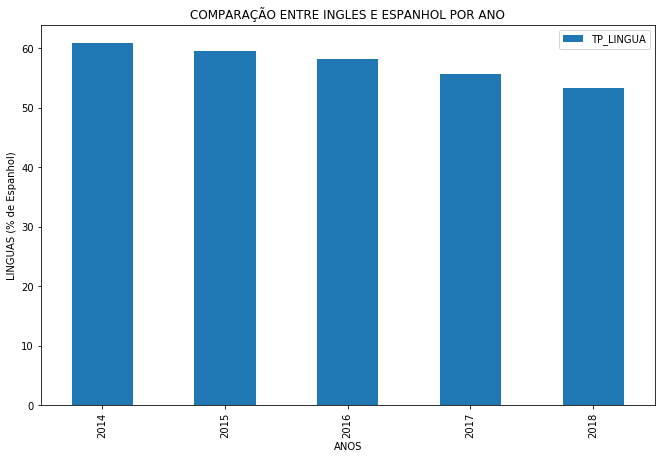

In [33]:
rate_lingua = pd.DataFrame((ESPANHOL/(INGLES+ESPANHOL)) * 100)
rate_lingua.plot(kind='bar')
plt.title('COMPARAÇÃO ENTRE INGLES E ESPANHOL POR ANO')
plt.xlabel('ANOS')
plt.ylabel('LINGUAS (% de Espanhol)')
plt.show()

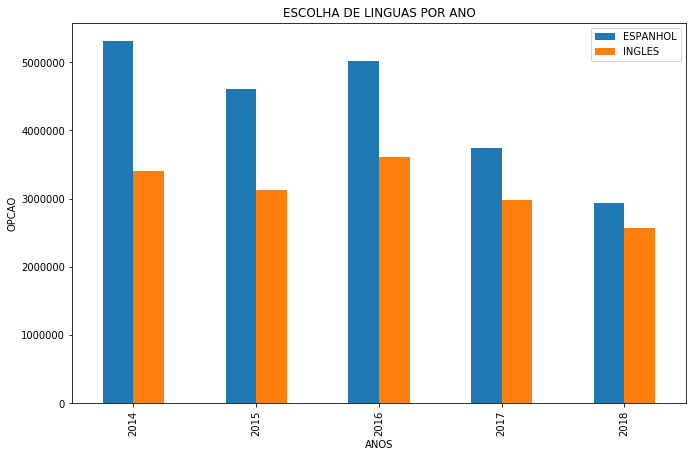

In [34]:
pd.DataFrame({
    "ESPANHOL":ESPANHOL,
    "INGLES":INGLES,
}).plot(kind='bar')
plt.title('ESCOLHA DE LINGUAS POR ANO')
plt.xlabel('ANOS')
plt.ylabel('OPCAO')
plt.show()

In [35]:
ENEM_NORTE = ENEM[ENEM['REGIAO'] == "1"]
ESPANHOL_NORTE = ENEM_NORTE[ENEM_NORTE['TP_LINGUA'] == 
                            1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]

INGLES_NORTE = ENEM_NORTE[ENEM_NORTE['TP_LINGUA'] == 
                          0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_NORTE.head()

NU_ANO
2014    317468
2015    232457
2016    285648
2017    245260
2018    203058
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

In [37]:
ESPANHOL_NORTE.head()

NU_ANO
2014    497843
2015    582854
2016    670467
2017    550312
2018    413892
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

In [36]:
ENEM_NORDESTE = ENEM[ENEM['REGIAO'] == "2"]
ESPANHOL_NORDESTE = ENEM_NORDESTE[ENEM_NORDESTE['TP_LINGUA'] == 
                                  1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_NORDESTE = ENEM_NORDESTE[ENEM_NORDESTE['TP_LINGUA'] == 
                                0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]

INGLES_NORDESTE.head()

NU_ANO
2014    970679
2015    798272
2016    942652
2017    786617
2018    678580
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

In [38]:
ENEM_SUDESTE = ENEM[ENEM['REGIAO'] == "3"]
ESPANHOL_SUDESTE = ENEM_SUDESTE[ENEM_SUDESTE['TP_LINGUA'] == 
                                1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUDESTE = ENEM_SUDESTE[ENEM_SUDESTE['TP_LINGUA'] == 
                              0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUDESTE.head()

NU_ANO
2014    1107358
2015    1480533
2016    1671138
2017    1410847
2018    1211450
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

In [41]:
ENEM_SUL = ENEM[ENEM['REGIAO'] == "4"]
ESPANHOL_SUL = ENEM_SUL[ENEM_SUL['TP_LINGUA'] == 1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUL = ENEM_SUL[ENEM_SUL['TP_LINGUA'] == 0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUL.head()

NU_ANO
2014    360712
2015    384573
2016    444267
2017    331116
2018    296040
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

In [39]:
ENEM_COESTE = ENEM[ENEM['REGIAO'] == "5"]
ESPANHOL_COESTE = ENEM_COESTE[ENEM_COESTE['TP_LINGUA'] == 
                              1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_COESTE = ENEM_COESTE[ENEM_COESTE['TP_LINGUA'] == 
                            0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_COESTE.head()

NU_ANO
2014    276917
2015    238063
2016    262867
2017    207827
2018    185418
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

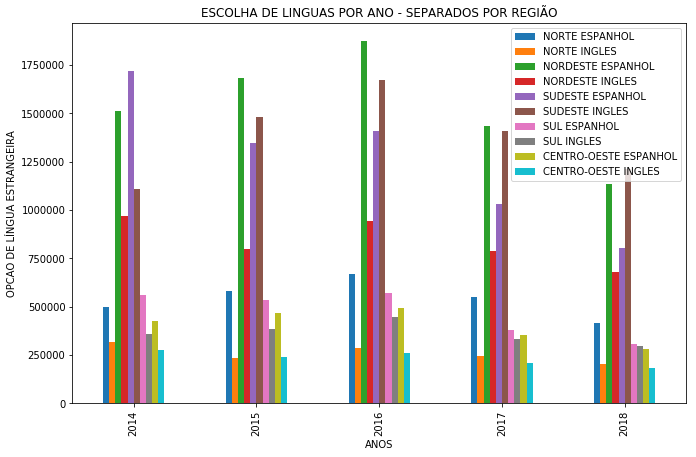

In [46]:
pd.DataFrame({
    "NORTE ESPANHOL":ESPANHOL_NORTE,
    "NORTE INGLES":INGLES_NORTE,
    "NORDESTE ESPANHOL":ESPANHOL_NORDESTE,
    "NORDESTE INGLES":INGLES_NORDESTE,
    "SUDESTE ESPANHOL":ESPANHOL_SUDESTE,
    "SUDESTE INGLES":INGLES_SUDESTE,
    "SUL ESPANHOL":ESPANHOL_SUL,
    "SUL INGLES":INGLES_SUL,
    "CENTRO-OESTE ESPANHOL":ESPANHOL_COESTE,
    "CENTRO-OESTE INGLES":INGLES_COESTE,
}).plot(kind='bar')
plt.title('ESCOLHA DE LINGUAS POR ANO - SEPARADOS POR REGIÃO')
plt.xlabel('ANOS')
plt.ylabel('OPCAO DE LÍNGUA ESTRANGEIRA')
plt.show()

In [43]:
#liberar memoria sem uso
import gc 
gc.collect()

10657